# Usage

In [1]:
%matplotlib inline

import glob
import shutil
import tempfile

import matplotlib.pyplot as plt
from astropy.io import fits
from ndcombine import combine_arrays
from ndcombine.utils import make_fake_data

First, let's create some fake images with a few sources and cosmic rays. The
FITS files are created in a temporary directory:

In [2]:
tmpdir = tempfile.mkdtemp()
make_fake_data(10, tmpdir, nsources=15, ncosmics=10, shape=(100, 100))

..........

Now we can read the images and plot a few of them:

In [3]:
data = [fits.getdata(f) for f in glob.glob(f'{tmpdir}/*.fits')]
len(data)

10

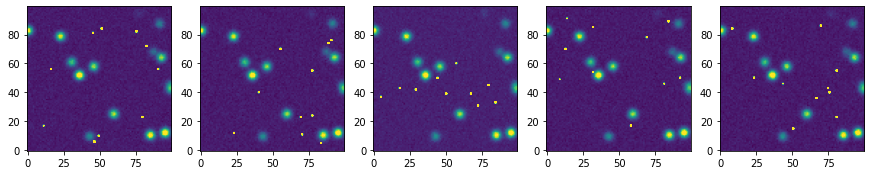

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(5 * 3, 3))
for ax, arr in zip(axes, data):
    ax.imshow(arr, origin='lower', vmax=1000)

And we can combine the images with the `combine_arrays` function:

In [5]:
out = combine_arrays(data, method='mean', clipping_method='sigclip')

The output of `combine_arrays` is a [NDData](https://docs.astropy.org/en/latest/api/astropy.nddata.NDData.html) object:

In [6]:
out

NDData([[205.48490906, 195.53549347, 208.11802673, ..., 195.76672058,
         198.55113983, 191.07581482],
        [191.82683716, 208.75389862, 198.61694031, ..., 209.15925598,
         190.55748444, 191.59490051],
        [200.75752411, 197.99489594, 200.71036682, ..., 201.98721466,
         186.91941681, 192.65893707],
        ...,
        [204.41634827, 207.21008759, 201.93208923, ..., 203.25865326,
         200.95804596, 207.46765747],
        [196.69404297, 201.06773071, 202.44575806, ..., 189.55034637,
         204.5367157 , 200.54300385],
        [198.3311615 , 194.67256927, 194.18457031, ..., 196.0560318 ,
         204.5740097 , 204.50482635]])

In its `meta` dict it also contains an array with the number of values that have been rejected for each pixel:

In [7]:
out.meta['REJMAP']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

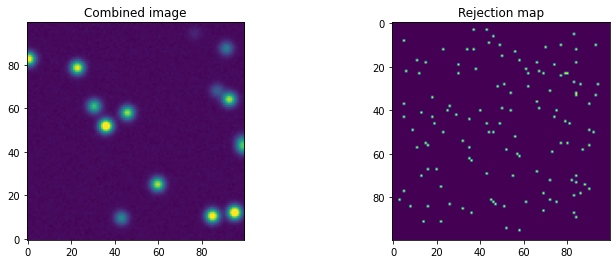

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2 * 6, 4))
ax1.imshow(out.data, origin='lower', vmax=1000)
ax2.imshow(out.meta['REJMAP'])
ax1.set(title='Combined image')
ax2.set(title='Rejection map');

In [9]:
# Cleanup
shutil.rmtree(tmpdir)